In [1]:
pip install gym


  Created wheel for gym: filename=gym-0.18.0-py3-none-any.whl size=1656452 sha256=cb826b4e5048f1c57c73b3a382dfbb8db8ef3160bff4f2fe1120af8a8e368fc5
  Stored in directory: c:\users\62896\appdata\local\pip\cache\wheels\d8\e7\68\a3f0f1b5831c9321d7523f6fd4e0d3f83f2705a1cbd5daaa79
Successfully built gym
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.0.1
    Uninstalling Pillow-8.0.1:
      Successfully uninstalled Pillow-8.0.1


In [2]:
import gym
import itertools
import matplotlib
import matplotlib.style
import numpy as np
import pandas as pd
import sys

In [3]:
from collections import defaultdict
from windy_gridworld import WindyGridworldEnv
import plotting

matplotlib.style.use('ggplot')

In [4]:
env = WindyGridworldEnv()

In [5]:
def createEpsilonGreedyPolicy(Q, epsilon, num_actions):
    def policyFunction(state):
        
        Action_probabilities = np.ones(num_actions,
                                      dtype = float) * epsilon / num_actions
        
        best_action = np.argmax(Q[state])
        Action_probabilities[best_action] += (1.0 - epsilon)
        return Action_probabilities
    
    return policyFunction

In [6]:
def qLearning(env, num_episodes, discount_factor = 1.0,
              alpha = 0.6, epsilon = 0.1):
    # Action value function
    # A nested dictionary that maps
    # state -> (action -> action-value)
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # Keeps track of useful statictics
    stats = plotting.EpisodeStats(
        episode_lengths = np.zeros(num_episodes),
        episode_rewards = np.zeros(num_episodes))
    
    # Create an epsilon greedy policy function
    # appropriately for environment action space
    policy = createEpsilonGreedyPolicy(Q, epsilon, env.action_space.n)
    
    # For every episode
    for ith_episode in range(num_episodes):
        
        # Reset the environment and pick the first action
        state = env.reset()
        
        for t in itertools.count():
            
            # get probabilities of all actions from current state
            action_probabilities = policy(state)
            # choose action according to
            # the probability distribution
            action = np.random.choice(np.arange(
                     len(action_probabilities)),
                      p = action_probabilities)
            
            # take action and get reward, transit to next state
            next_state, reward, done, _ = env.step(action)
            
            # Update statistics
            stats.episode_rewards[ith_episode] += reward
            stats.episode_lengths[ith_episode] = t
            
            # TD Update
            best_next_action = np.argmax(Q[next_state])
            td_target = reward + discount_factor * Q[next_state][best_next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta
            
            # done is True if episode terminated
            if done:
                break
            
            state = next_state
            
    return Q, stats

In [7]:
Q, stats = qLearning(env, 1000)

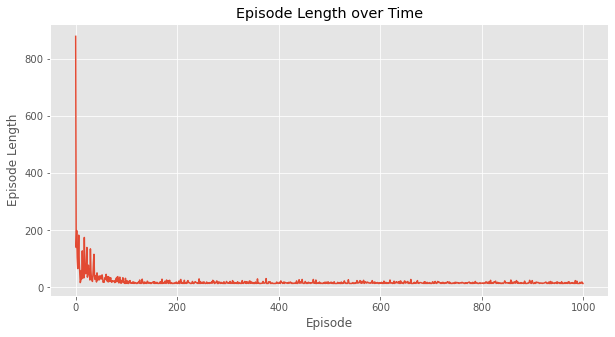

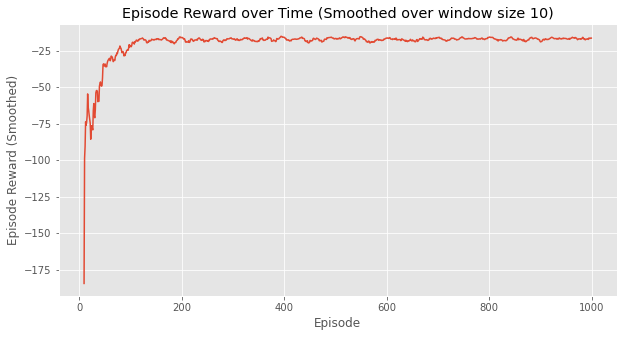

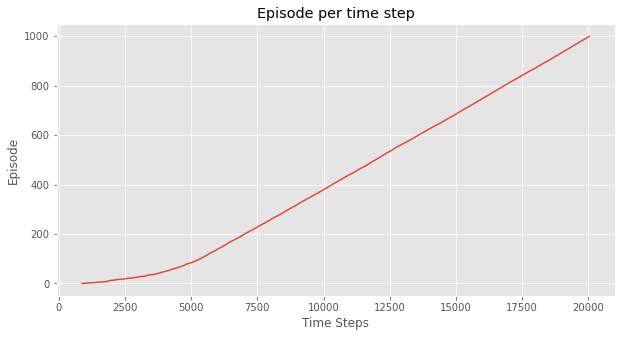

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [8]:
plotting.plot_episode_stats(stats)

In [9]:
import numpy as np
import pylab as pl
import networkx as nx

In [10]:
edges = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2),
         (1, 3), (9, 10), (2, 4), (0, 6), (6, 7),
         (8, 9), (7, 8), (1, 7), (3, 9)]

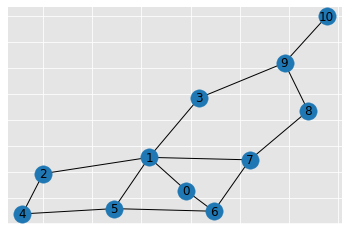

In [11]:
goal = 10
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
pl.show()

In [12]:
MATRIX_SIZE = 11
M = np.matrix(np.ones(shape =(MATRIX_SIZE, MATRIX_SIZE)))
M *= -1

for point in edges:
    print(point)
    if point[1] == goal:
        M[point] = 100
    else:
        M[point] = 0
    
    if point[0] == goal:
        M[point[::-1]] = 100
    else:
        M[point[::-1]] = 0
        # reverse of point

M[goal, goal] = 100
print(M)

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(1, 3)
(9, 10)
(2, 4)
(0, 6)
(6, 7)
(8, 9)
(7, 8)
(1, 7)
(3, 9)
[[ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.   0.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0. 100.]]


In [13]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))

gamma = 0.75
# learning parameter
initial_state = 1

In [14]:
def available_actions(state):
    current_state_row = M[state, ]
    available_action = np.where(current_state_row >= 0)[1]
    return available_action

available_action = available_actions(initial_state)

In [15]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_action, 1))
    return next_action

action = sample_next_action(available_action)

In [16]:
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    Q[current_state, action] = M[current_state, action] + gamma * max_value
    if(np.max(Q) > 0):
        return(np.sum(Q / np.max(Q)*100))
    else:
        return (0)

In [17]:
update(initial_state, action, gamma)

0

In [18]:
scores = []
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_action = available_actions(current_state)
    action = sample_next_action(available_action)
    score = update(current_state, action, gamma)
    scores.append(score)

Most efficient path:
[0, 1, 3, 9, 10]


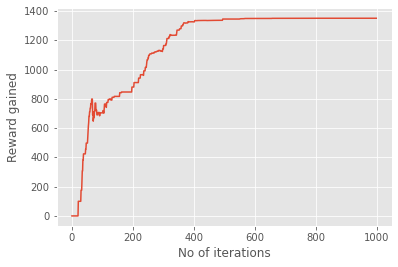

In [19]:
# Testing
current_state = 0
steps = [current_state]

while current_state != 10:
    
    next_step_index = np.where(Q[current_state, ] == np.max(Q[current_state, ]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

pl.plot(scores)
pl.xlabel('No of iterations')
pl.ylabel('Reward gained')
pl.show()

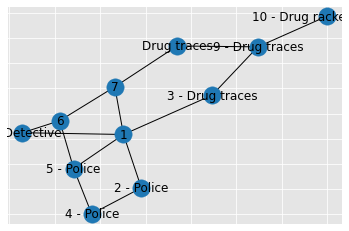

In [20]:
police = [2, 4, 5]
drug_traces = [3, 8, 9]

G = nx.Graph()
G.add_edges_from(edges)
mapping = {0:'0 - Detective', 1:'1', 2:'2 - Police', 3:'3 - Drug traces',
           4:'4 - Police', 5:'5 - Police', 6:'6', 7:'7', 8:'Drug traces',
           9:'9 - Drug traces', 10:'10 - Drug racket location'}

H = nx.relabel_nodes(G, mapping)
pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H, pos)
nx.draw_networkx_edges(H, pos)
nx.draw_networkx_labels(H, pos)
pl.show()

In [21]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
env_police = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
env_drugs = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
initial_state = 1

In [22]:
def available_actions(state):
    current_state_row = M[state, ]
    av_action = np.where(current_state_row >= 0)[1]
    return av_action

In [23]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_action, 1))
    return next_action

In [24]:
def collect_environmental_data(action):
    found = []
    if action in police:
        found.append('p')
    if action in drug_traces:
        found.append('d')
    return (found)

available_action = available_actions(initial_state)
action = sample_next_action(available_action)

In [25]:
def update(current_state, action, gamma):
    max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    Q[current_state, action] = M[current_state, action] + gamma * max_value
    environment = collect_environmental_data(action)
    if 'p' in environment:
        env_police[current_state, action] += 1
    if 'd' in environment:
        env_drugs[current_state, action] += 1
    if(np.max(Q) > 0):
        return(np.sum(Q / np.max(Q)*100))
    else:
        return (0)
update(initial_state, action, gamma)

0

In [26]:
def available_actions_with_env_help(state):
    current_state_row = M[state, ]
    av_action = np.where(current_state_row >= 0)[1]
    
    # if there are multiple routes, dis-favor anything negative
    env_pos_row = env_matrix_snap[state, av_action]
    
    if(np.sum(env_pos_row < 0)):
        temp_av_action = av_action[np.array(env_pos_row)[0] >= 0]
        if len(temp_av_action) > 0:
            av_action = temp_av_action
    return av_action

In [27]:
scores = []
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_action = available_actions(current_state)
    action = sample_next_action(available_action)
    score = update(current_state, action, gamma)

In [28]:
print('Police Found')
print(env_police)
print('')
print('Drug traces Found')
print(env_drugs)

Police Found
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 17.  0.  0. 14.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 58.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 45.  0.  0. 44.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 27.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 27.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

Drug traces Found
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 20.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 58.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 22.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 48.  0.]
 [ 0.  0.  0. 23.  0.  0.  

In [29]:
import gym
env = gym.make("Taxi-v3").env
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [30]:
env.reset() # reset environment to a new, random state
env.render()

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action Space Discrete(6)
State Space Discrete(500)


In [31]:
# (taxi row, taxi column, passenger index, destination index)
state = env.encode(3, 1, 2, 0)
print("State:", state)

env.s = state
env.render()

State: 328
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [32]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [33]:
import numpy as np
import gym

In [34]:
#Building the environment
env = gym.make('FrozenLake-v0')

In [35]:
#Defining the different parameters
epsilon = 0.9
total_episodes = 10000
max_steps = 100
alpha = 0.85
gamma = 0.95

#Initializing the Q-matrix
Q = np.zeros((env.observation_space.n, env.action_space.n))

In [36]:
#Function to choose the next action
def choose_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])
    return action

#Function to learn the Q-value
def update(state, state2, reward, action, action2):
    predict = Q[state, action]
    target = reward + gamma * Q[state2, action2]
    Q[state, action] = Q[state, action] + alpha * (target - predict)

In [37]:
#Initializing the reward
reward=0

# Starting the SARSA learning
for episode in range(total_episodes):
    t = 0
    state1 = env.reset()
    action1 = choose_action(state1)
    
    while t < max_steps:
        #Visualizing the training
        env.render()
        
        #Getting the next state
        state2, reward, done, info = env.step(action1)
        
        #Choosing the next action
        action2 = choose_action(state2)
        
        #Learning the Q-value
        update(state1, state2, reward, action1, action2)
        
        state1 = state2
        action1 = action2
        
        #Updating the respective values
        t += 1
        reward += 1
        
        #If at the end of learning process
        if done:
            break


SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG

SFFF

In [38]:
#Evaluating the performance
print("Performance : ", reward/total_episodes)

#Visualizing the Q-matrix
print(Q)

Performance :  0.0001
[[3.21034040e-03 8.16457193e-03 1.99284286e-03 1.01003467e-02]
 [3.07863805e-04 4.85737988e-04 1.61104870e-04 4.48903864e-03]
 [1.41701431e-02 3.85538553e-03 2.59731920e-02 1.46858795e-03]
 [5.97544184e-04 1.84421528e-04 3.58255059e-02 8.14858397e-03]
 [3.30890741e-04 1.87725016e-03 1.84321438e-03 5.69351284e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.05887758e-03 2.46613346e-03 7.03939207e-04 3.62284571e-08]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.15327126e-04 2.96543029e-04 1.13078976e-04 2.00079711e-03]
 [1.39330350e-03 4.37071410e-04 9.69198092e-02 2.03133496e-01]
 [1.18469922e-02 5.43022915e-03 3.76860884e-02 1.15014976e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.53438764e-04 1.08152596e-01 2.73348871e-04 4.56547529e-05]
 [7.31856583e-01 6.02269967e-01 1.32587239e-01 6.44148830e-01]
 [0.00000000e+00 0.00000000e+00 0